In [1]:
import pandas as pd

In [2]:
# (1) Используя параметры pandas прочитать красиво пандас 
df = pd.read_csv('UCI_Credit_Card.csv') #TODO

In [17]:
df['MARRIAGE'].describe()

count    30000.000000
mean         1.551867
std          0.521970
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: MARRIAGE, dtype: float64

In [4]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)
print(df.info())
print(df.mean())
print(df['LIMIT_BAL'].describe())
print(df.min())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [ ]:
#TODO

In [5]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

df['ID'][(df['SEX'] == 2) & (df['EDUCATION'] == 2)].count()

8656

In [101]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
#TODO
df.groupby('default.payment.next.month').median().loc[:,'PAY_0':'PAY_AMT6']

PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
default.payment.next.month                                             
0                             0.0    0.0    0.0    0.0    0.0    0.0   
1                             1.0    0.0    0.0    0.0    0.0    0.0   

                            BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
default.payment.next.month                                               
0                             23119.5    21660.5    20202.5    19000.0   
1                             20185.0    20300.5    19834.5    19119.5   

                            BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
default.payment.next.month                                             
0                             17998.0    16679.0    2459.5    2247.5   
1                             18478.5    18028.5    1636.0    1533.5   

                            PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
default.payment.next.month                                          
0                             2000.0    1734.0    1765.0    1706.0  
1                             1222.0    1000.0    1000.0    1000.0

In [12]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE

df.pivot_table(index='SEX', columns=['EDUCATION', 'MARRIAGE'],values=['ID'],  aggfunc='count')

#train.pivot_table('PassengerId', 'Pclass', 'Survived', 'count')

ID                                                             \
EDUCATION    0         1                          2                         
MARRIAGE     1    2    0       1       2     3    0       1       2     3   
SEX                                                                         
1          2.0  6.0  1.0  1690.0  2633.0  30.0  1.0  2370.0  2940.0  63.0   
2          2.0  4.0  3.0  2032.0  4176.0  20.0  5.0  4472.0  4080.0  99.0   

          ...                                                             
EDUCATION ...      3     4                 5                6             
MARRIAGE  ...      3     1     2    3      1     2    3     1     2    3  
SEX       ...                                                             
1         ...   36.0  18.0  23.0  1.0   48.0  46.0  1.0  14.0  11.0  NaN  
2         ...   67.0  34.0  45.0  2.0  102.0  81.0  2.0  14.0  10.0  2.0  

[2 rows x 23 columns]

In [30]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

#TODO
def newColumn(i):
    if i <= 10000:
        return 'A'
    if i <=100000 and i > 10000:
        return 'B'
    if i<=200000 and i>100000:
        return 'C'
    if i<=400000 and i>200000:
        return 'D'
    if i<=700000 and i>400000:
        return 'E'
    if i>700000:
        return 'F'

df['A-F'] = df['LIMIT_BAL'].map(newColumn)

In [38]:
df[['A-F','LIMIT_BAL']]

A-F  LIMIT_BAL
0       B    20000.0
1       C   120000.0
2       B    90000.0
3       B    50000.0
4       B    50000.0
5       B    50000.0
6       E   500000.0
7       B   100000.0
8       C   140000.0
9       B    20000.0
10      C   200000.0
11      D   260000.0
12      E   630000.0
13      B    70000.0
14      D   250000.0
15      B    50000.0
16      B    20000.0
17      D   320000.0
18      D   360000.0
19      C   180000.0
20      C   130000.0
21      C   120000.0
22      B    70000.0
23      E   450000.0
24      B    90000.0
25      B    50000.0
26      B    60000.0
27      B    50000.0
28      B    50000.0
29      B    50000.0
...    ..        ...
29970   D   360000.0
29971   B    80000.0
29972   C   190000.0
29973   D   230000.0
29974   B    50000.0
29975   D   220000.0
29976   B    40000.0
29977   E   420000.0
29978   D   310000.0
29979   C   180000.0
29980   B    50000.0
29981   B    50000.0
29982   B    90000.0
29983   B    20000.0
29984   B    30000.0
29985   D   240000.0
29986   D   360000.0
29987   C   130000.0
29988   D   250000.0
29989   C   150000.0
29990   C   140000.0
29991   D   210000.0
29992   A    10000.0
29993   B   100000.0
29994   B    80000.0
29995   D   220000.0
29996   C   150000.0
29997   B    30000.0
29998   B    80000.0
29999   B    50000.0

[30000 rows x 2 columns]

In [40]:
%matplotlib inline

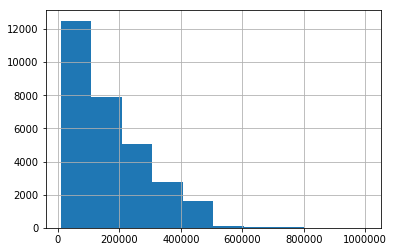

In [41]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)
df['LIMIT_BAL'].hist()

In [42]:
df #TODO

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
5          6    50000.0    1          1         2   37      0      0      0   
6          7   500000.0    1          1         2   29      0      0      0   
7          8   100000.0    2          2         2   23      0     -1     -1   
8          9   140000.0    2          3         1   28      0      0      2   
9         10    20000.0    1          3         2   35     -2     -2     -2   
10        11   200000.0    2          3         2   34      0      0      2   
11        12   260000.0    2          1         2   51     -1     -1     -1   
12        13   630000.0    2          2         2   41     -1      0     -1   
13        14    70000.0    1          2         2   30      1      2      2   
14        15   250000.0    1          1         2   29      0      0      0   
15        16    50000.0    2          3         3   23      1      2      0   
16        17    20000.0    1          1         2   24      0      0      2   
17        18   320000.0    1          1         1   49      0      0      0   
18        19   360000.0    2          1         1   49      1     -2     -2   
19        20   180000.0    2          1         2   29      1     -2     -2   
20        21   130000.0    2          3         2   39      0      0      0   
21        22   120000.0    2          2         1   39     -1     -1     -1   
22        23    70000.0    2          2         2   26      2      0      0   
23        24   450000.0    2          1         1   40     -2     -2     -2   
24        25    90000.0    1          1         2   23      0      0      0   
25        26    50000.0    1          3         2   23      0      0      0   
26        27    60000.0    1          1         2   27      1     -2     -1   
27        28    50000.0    2          3         2   30      0      0      0   
28        29    50000.0    2          3         1   47     -1     -1     -1   
29        30    50000.0    1          1         2   26      0      0      0   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29970  29971   360000.0    1          1         1   34     -1     -1     -1   
29971  29972    80000.0    1          3         1   36      0      0      0   
29972  29973   190000.0    1          1         1   37      0      0      0   
29973  29974   230000.0    1          2         1   35      1     -2     -2   
29974  29975    50000.0    1          2         1   37      1      2      2   
29975  29976   220000.0    1          2         1   41      0      0     -1   
29976  29977    40000.0    1          2         2   47      2      2      3   
29977  29978   420000.0    1          1         2   34      0      0      0   
29978  29979   310000.0    1          2         1   39      0      0      0   
29979  29980   180000.0    1          1         1   32     -2     -2     -2   
29980  29981    50000.0    1          3         2   42      0      0      0   
29981  29982    50000.0    1          2         1   44      1      2      2   
29982  29983    90000.0    1          2         1   36      0      0      0   
29983  29984    20000.0    1          2         1   44     -2     -2     -2   
29984  29985    30000.0    1          2         2   38     -1     -1     -2   
29985  29986   240000.0    1          1         2   30     -2     -2     -2   
29986  29987   360000.0    1          1         2   35     -1     -1     -2   
29987  29988   130000.0    1          1         2   34      0      0      0   
29988  29989   250000.0    1          1         1   34      

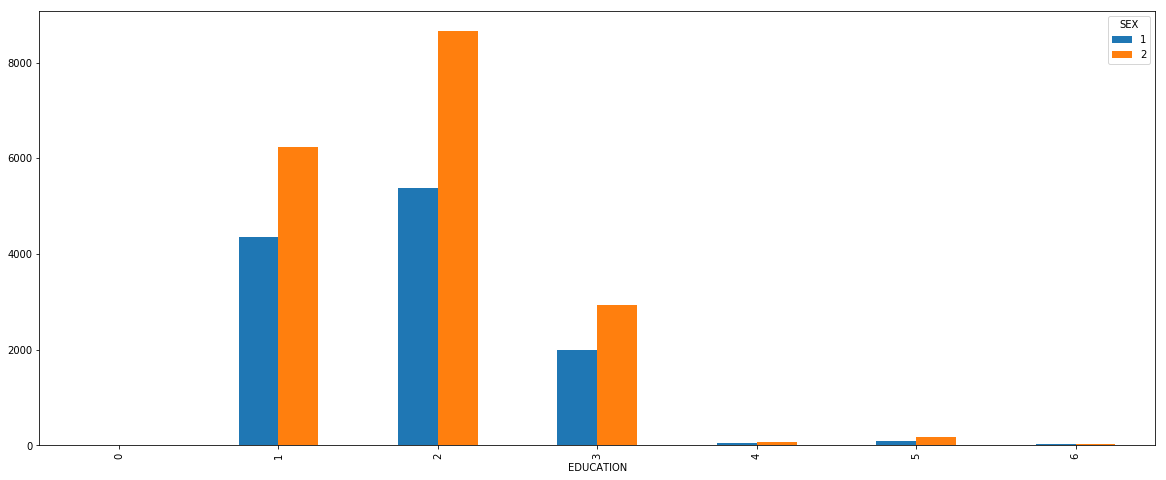

In [103]:
# (8) построить зависимость кредитного лимита от образования для каждого пола
# график необходимо сделать очень широким (на весь экран)

from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(20,8))

df.pivot_table('LIMIT_BAL',['EDUCATION'],['SEX'],'count').plot(kind='bar', ax=ax)

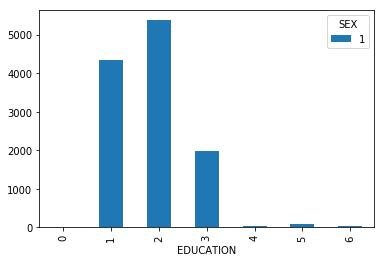

In [82]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов

#TODO
df[df['SEX'] == 1].pivot_table('LIMIT_BAL',['EDUCATION'],['SEX'],'count').plot(kind='bar')

In [85]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
import seaborn as sns

#TODO

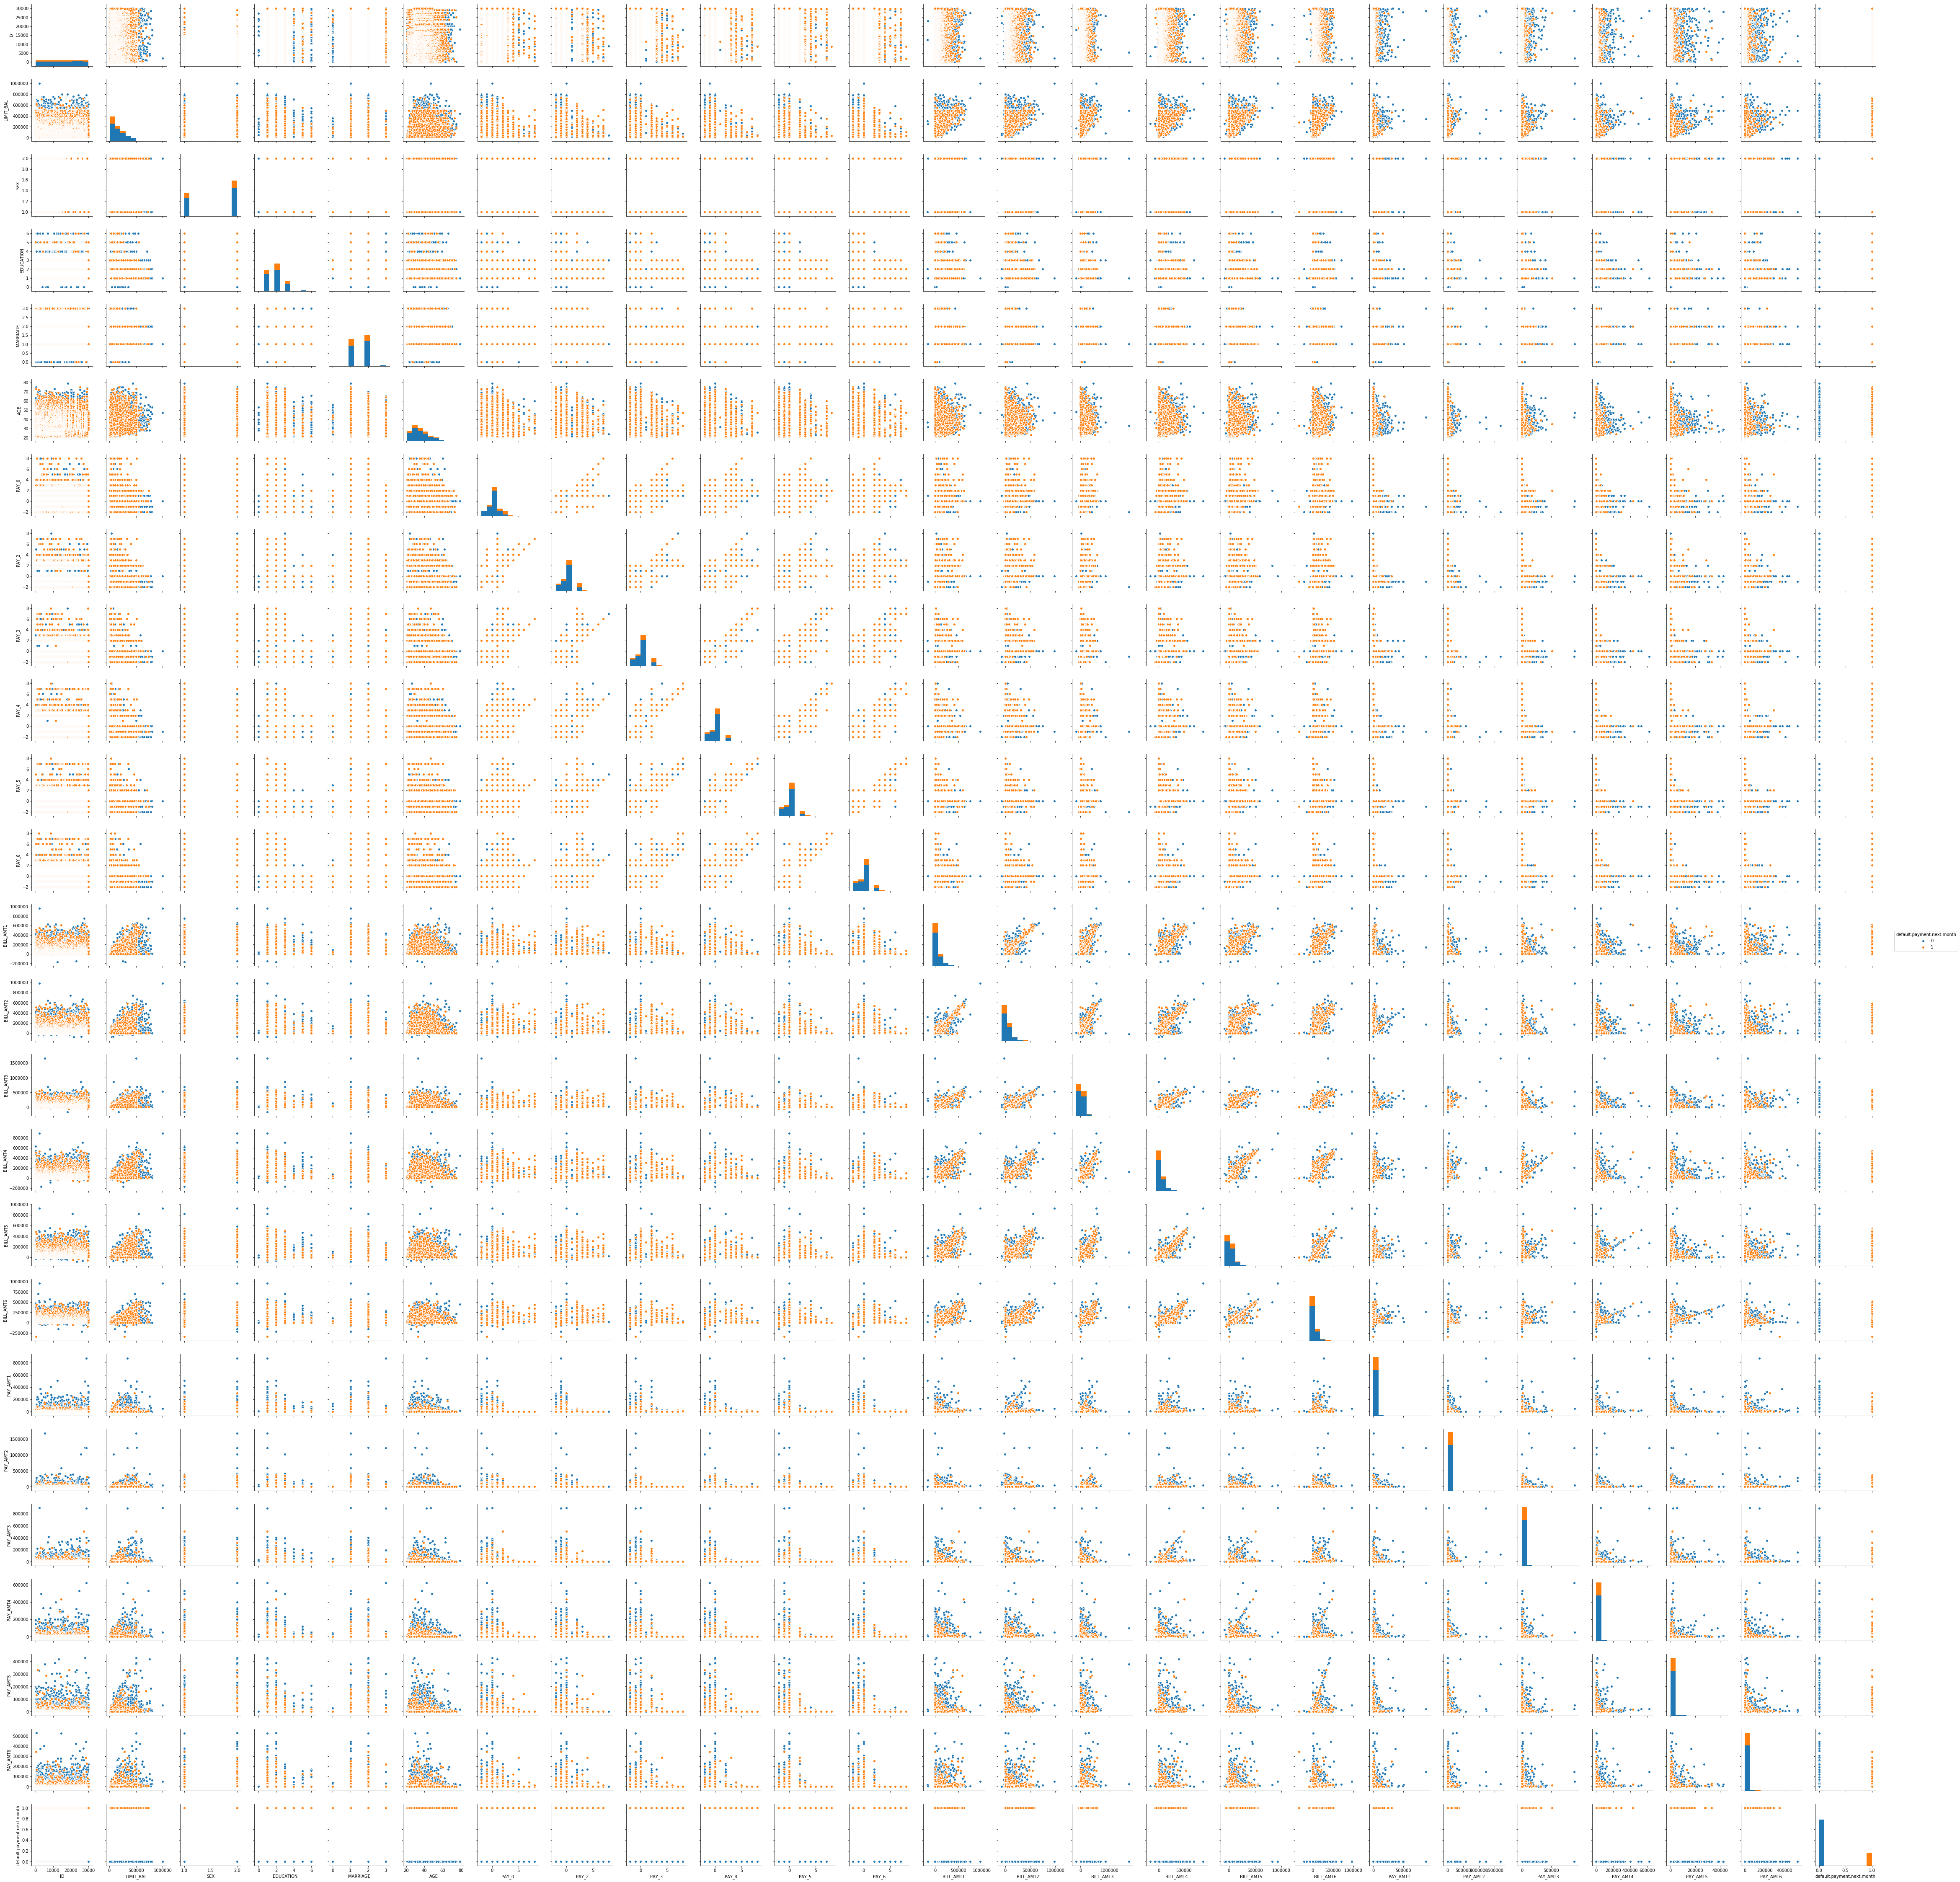

In [88]:
sns.pairplot(df, hue='default.payment.next.month')

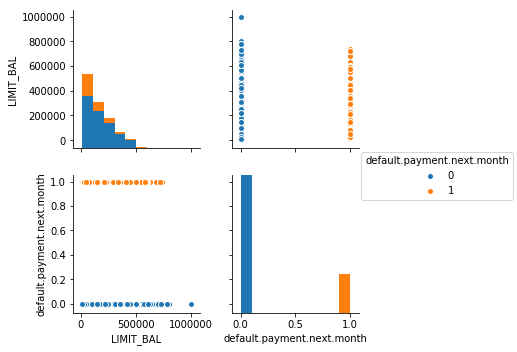

In [91]:
sns.pairplot(df[['LIMIT_BAL','default.payment.next.month']], hue='default.payment.next.month')

C:\Users\iseob\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


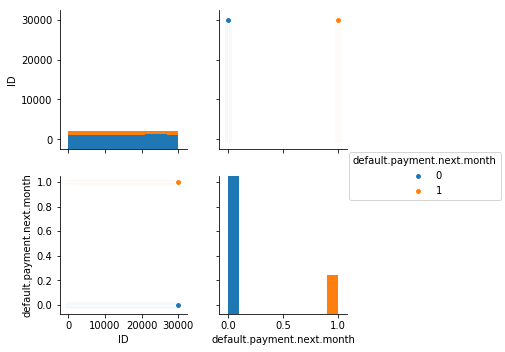

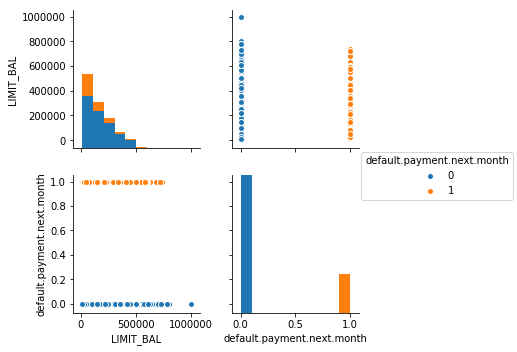

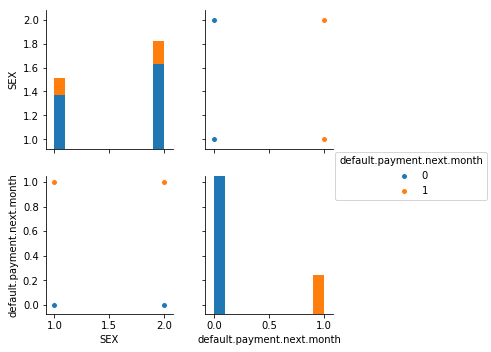

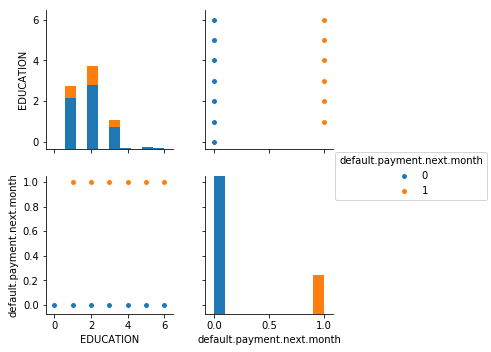

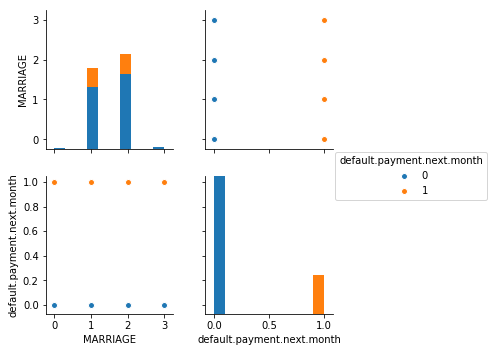

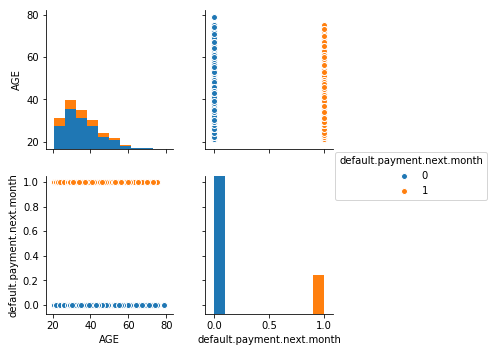

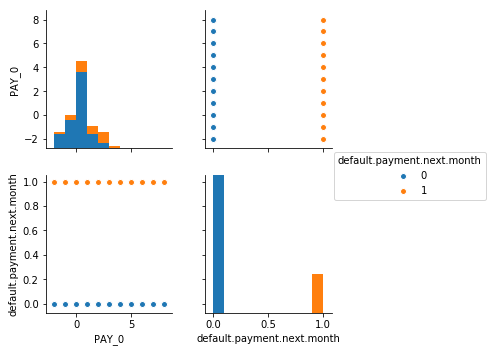

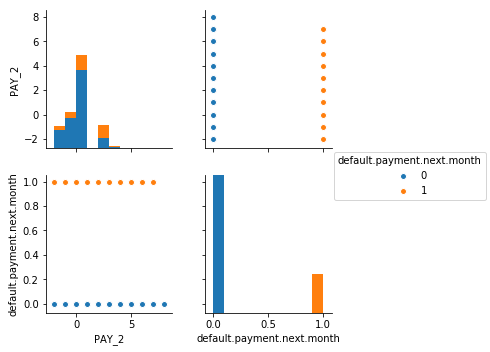

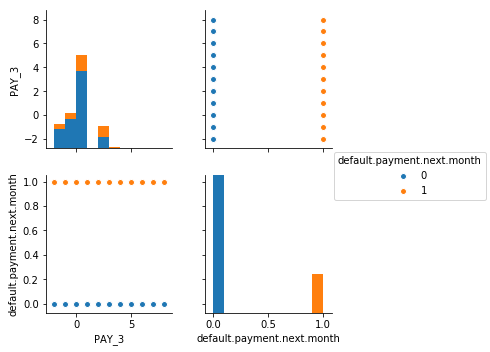

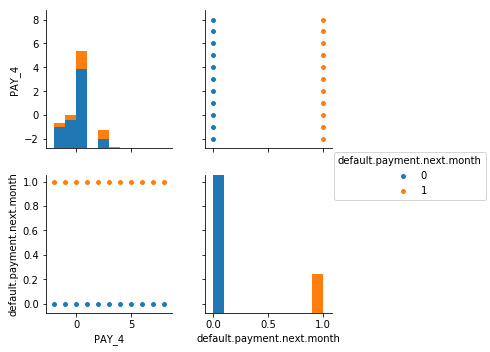

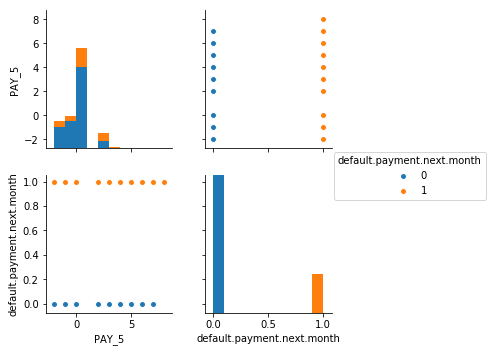

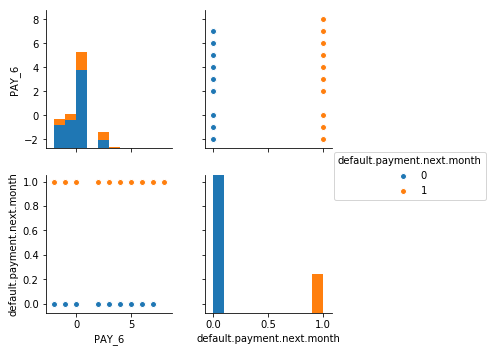

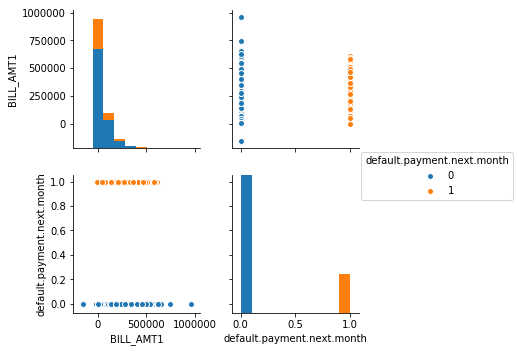

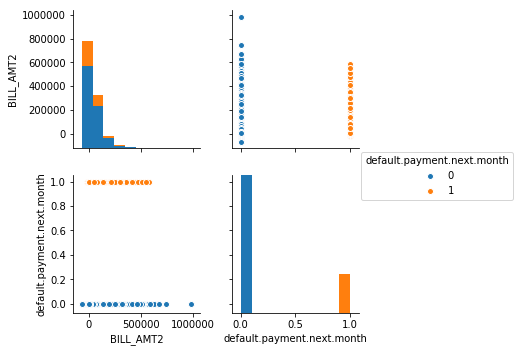

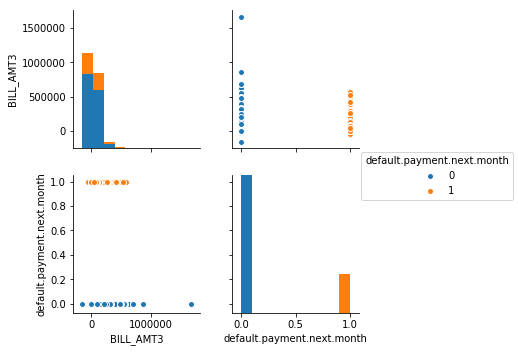

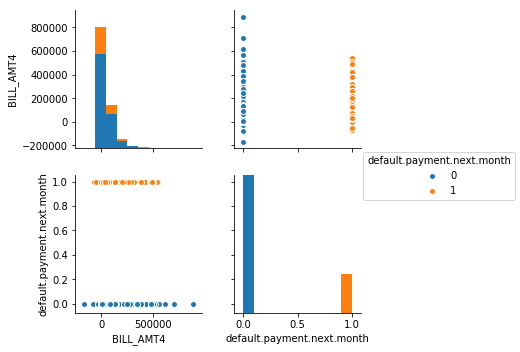

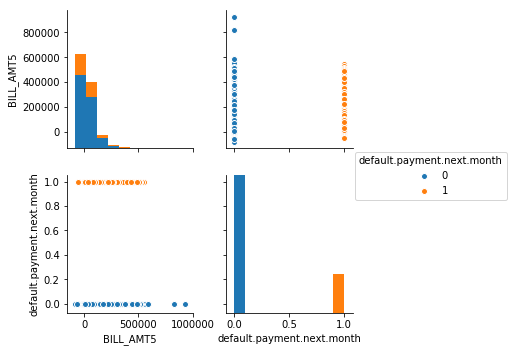

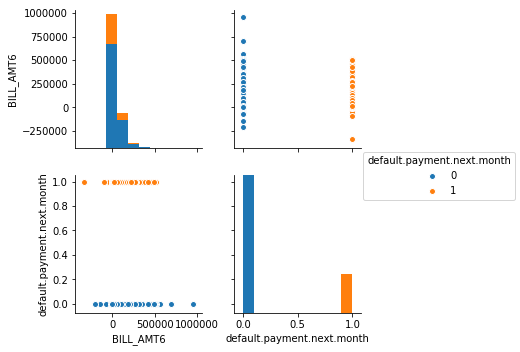

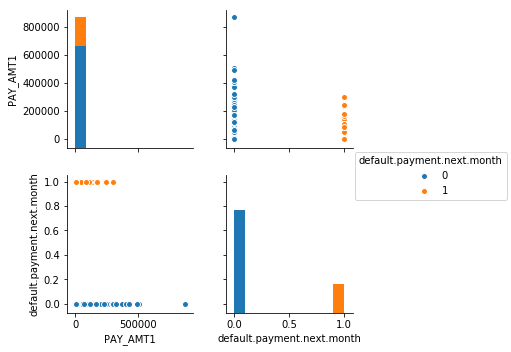

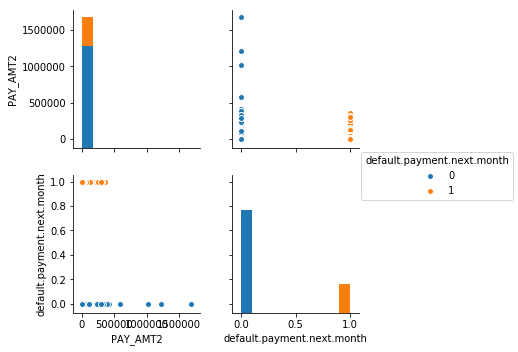

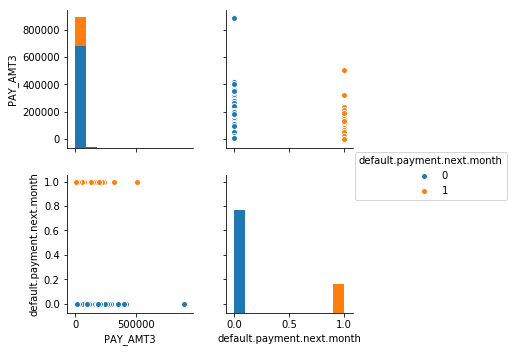

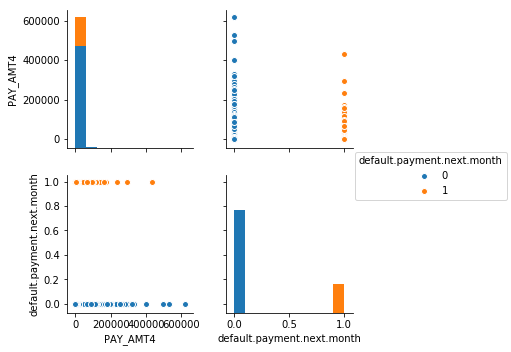

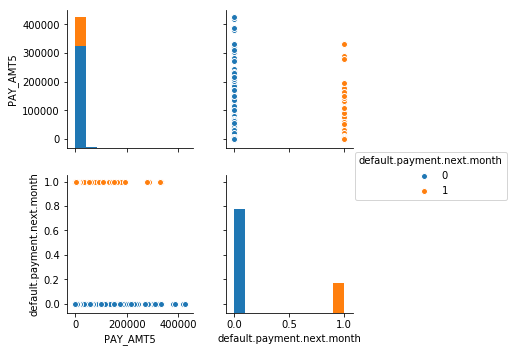

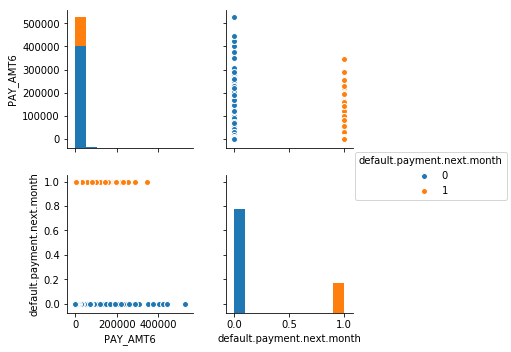

In [100]:
for i in df.columns[:-2]:
    sns.pairplot(df[[i,'default.payment.next.month']], hue='default.payment.next.month')